In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math

In [2]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [2]:
# define a string of the CFTR primary sequence
CFTR_seq = 'MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKKDDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDQPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRLSNSLEVLFQ'

F508del_cl_seq = 'PLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSL'

F508del_op_seq = 'MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDQPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFP'

residues_WT_cl = np.arange(1,1437)
residues_WT_op = np.arange(1,1452)

residues_F508del_cl = np.arange(1,len(F508del_cl_seq)-1)
residues_F508del_op = np.arange(1,1181)

# define a useful dictionary for converting amino acid one letter codes to three letter codes 
aa = {'A': "ALA", 'G': "GLY", 'D': 'ASP', 'R': "ARG", 'H': "HIS",
      'K': 'LYS', 'E': 'GLU', 'S': 'SER', 'T': 'THR', 'N': 'ASN', 
      'Q': 'GLN', 'C': 'CYS', 'P': 'PRO', 'V': "VAL", 'I': 'ILE',
      'L': "LUE", 'M': 'MET', 'F': 'PHE', 'Y': 'TYR', 'W': 'TRP'
     }

In [3]:
def make_list(r1, r2): 
  
    # Testing if range r1 and r2  
    # are equal 
    if (r1 == r2): 
        return r1 
    else: 
        # Create empty list 
        res = [] 
        # loop to append successors to  
        # list until r2 is reached. 
        while(r1 < r2+1):
            res.append(r1) 
            r1 += 1
        return res 


In [9]:
def pull_data(path, num_structs, file_name):
    empty_dict = {}
    for i in num_structs:
        fnm = path + 'domain_res_RMSD/'+ file_name + '_{}.pdb'.format(i)
        x = np.genfromtxt(fnm, dtype = ['U256', 'float64'])
        empty_dict[str(i)] = x

    return empty_dict

In [5]:
def pull_data(path, num_structs, file_name):
    empty_dict = {}
    for i in num_structs:
        fnm = path + 'res_RMSD/'+ file_name + '_{}.pdb'.format(i)
        x = np.genfromtxt(fnm, dtype = ['U256', 'float64'])
        empty_dict[str(i)] = x

    return empty_dict


In [6]:
def search_rmsd(rmsd, rmsd_data):
    # here we go 
    # begin by looping though the sasa dictionary of all the SASA data
    for key, value in rmsd.items():
        # turn the key into a number so you can index with it 
        k = int(key)
        # try to take the res out of the data - this will through an exception if not found
        for i in value:
            try:
                res = int(i[0].split('_')[3][:-1])
            except ValueError:
                continue 
                
            
            rmsd_data.loc[res,k] = i[1]

    return(rmsd_data)

In [7]:
def re_index(re_ind_df,ref_df,del_num):
    ind = []
    for i, val in enumerate(ref_df['1']):
        if math.isnan(float(val)):
            continue
        if i == del_num:
            continue
        else: 
            ind.append(i)

    re_ind_df = pd.DataFrame.set_index(re_ind_df, np.array(ind))

    return re_ind_df

In [8]:
def lowest_scoring_n(path, num_structs, n):
    scores = [] 
    for i in num_structs:
        fnm = path + 'scores/' + 'score_{}.sc'.format(i)
        x = np.genfromtxt(fnm, dtype = ['U15', 'float64'], skip_header = 1 )
        scores.append(float(x[1][1]))
    scores_np = np.array(scores)
    lowest_scores = scores_np.argsort()[0:n]
    
    return lowest_scores

## Define Paths

In [10]:
# define the path to the files of interest
WT_path_cl = '../refine_WT/closed/'
WT_path_op = '../refine_WT/open/'

WT_CM_cl_path = '../CM_WT/closed_templates_only/'
WT_CM_op_path = '../CM_WT/open_templates_only/'

F508_cl_path = '../CM_F508del/closed_templates_only/'
F508_op_path = '../CM_F508del/open_templates_only/'

R1070W_cl_path = '../CM_R1070W_F508del/closed_templates_only/'
R1070W_op_path = '../CM_R1070W_F508del/open_templates_only/'

VX_cl_path = '../CM_VX809_F508del/closed_templates_only/'
VX_op_path = '../CM_VX809_F508del/open_templates_only/'

R1070W_VX_cl_path = '../CM_VX809_R1070W_F508del/closed_templates_only/'
R1070W_VX_op_path = '../CM_VX809_R1070W_F508del/open_templates_only/'

## Determine Lowest Scoring Models

In [11]:
F508del_cl_lowest = lowest_scoring_n(F508_cl_path ,range(2000), 100)

In [12]:
F508del_op_lowest= lowest_scoring_n(F508_op_path ,  np.concatenate([range(482), range(483,1221), range(1222,1244), range(1245,2000)]), 100)
#F508del_op_lowest= lowest_scoring_n(F508_op_path ,  range(2000), 100)

In [13]:
R1070W_cl_lowest = lowest_scoring_n(R1070W_cl_path ,range(2000), 100)

In [14]:
R1070W_op_lowest = lowest_scoring_n(R1070W_op_path ,range(2000),100)

In [15]:
VX_cl_lowest = lowest_scoring_n(VX_cl_path, range(2000), 100)

In [16]:
VX_op_lowest = lowest_scoring_n(VX_op_path, range(2000), 100)

In [17]:
WT_cl_lowest = lowest_scoring_n(WT_CM_cl_path, range(2000), 100)

In [18]:
WT_op_lowest = lowest_scoring_n(WT_CM_op_path, range(2000), 100)

In [19]:
R_VX_cl_lowest = lowest_scoring_n(R1070W_VX_cl_path ,range(2000), 100)

In [20]:
R_VX_op_lowest = lowest_scoring_n(R1070W_VX_op_path ,range(2000),100)

In [21]:
#WT_cl_lowest = lowest_scoring_n(WT_path_cl, range(2000), 200)

In [20]:
#WT_op_lowest = lowest_scoring_n(WT_path_op, range(2000), 200)

## Pull Data

In [22]:
WT_rmsd_cl_CM = pull_data(WT_CM_cl_path, WT_cl_lowest, '5uak_WT_res_rmsd' )

In [23]:
#WT_rmsd_cl = pull_data(WT_path_cl, WT_cl_lowest, '5uak_WT_res_rmsd' )

In [24]:
WT_rmsd_op_CM = pull_data(WT_CM_op_path, WT_op_lowest, '6msm_WT_res_rmsd' )

In [25]:
#WT_rmsd_op = pull_data(WT_path_op, WT_op_lowest, '6msm_WT_res_rmsd' )

In [26]:
F508del_rmsd_cl = pull_data(F508_cl_path, F508del_cl_lowest, '5uak_F508del_res_rmsd')

In [27]:
F508del_rmsd_op = pull_data(F508_op_path, F508del_op_lowest, '6msm_F508del_res_rmsd')

In [28]:
R1070W_rmsd_cl = pull_data(R1070W_cl_path, R1070W_cl_lowest , '5uak_R1070W_F508del_res_rmsd')

In [29]:
R1070W_rmsd_op = pull_data(R1070W_op_path, R1070W_op_lowest , '6msm_R1070W_F508del_res_rmsd')

In [30]:
VX_rmsd_cl = pull_data(VX_cl_path, VX_cl_lowest , '5uak_F508del_VX809_res_rmsd')

In [31]:
VX_rmsd_op = pull_data(VX_op_path, VX_op_lowest , '6msm_F508del_VX809_res_rmsd')

In [32]:
R_VX_rmsd_cl = pull_data(R1070W_VX_cl_path, R_VX_cl_lowest , '5uak_VX809_R1070W_F508del_res_rmsd')

In [36]:
R_VX_rmsd_op = pull_data(R1070W_VX_op_path, R_VX_op_lowest , '6msm_VX809_R1070W_F508del_res_rmsd')

## Rangle the RMSD data into a dataframe

In [37]:
WT_rmsd_data_cl_CM = pd.DataFrame(index = np.arange(1,len(F508del_cl_seq))+1)
search_rmsd(WT_rmsd_cl_CM, WT_rmsd_data_cl_CM)

print('finished')


finished


In [38]:
WT_rmsd_data_op_CM = pd.DataFrame(index = np.arange(1,len(F508del_op_seq))+1)
search_rmsd(WT_rmsd_op_CM, WT_rmsd_data_op_CM)
#WT_rmsd_data_op_CM.to_csv('WT_rmsd_data_op_CM_2000.csv', index = False)
print('finished')
#WT_rmsd_data_cl.to_csv('WT_rmsd_data_cl_refine_2000.csv', index = False)

finished


In [39]:
#WT_rmsd_data_cl = pd.DataFrame(index = residues_WT_cl)
#search_rmsd(WT_rmsd_cl, WT_rmsd_data_cl)
#WT_rmsd_data_op.to_csv('WT_rmsd_data_op_refine_2000.csv', index = False)
#print('finished')

In [40]:
#WT_rmsd_data_op = pd.DataFrame(index = residues_WT_op)
#search_rmsd(WT_rmsd_op, WT_rmsd_data_op)
#WT_rmsd_data_op.to_csv('WT_rmsd_data_op_refine_2000.csv', index = False)
#print('finished')

In [41]:
F508del_rmsd_data_cl = pd.DataFrame(index = residues_F508del_cl)
search_rmsd(F508del_rmsd_cl, F508del_rmsd_data_cl)
#F508del_rmsd_data_cl.to_csv('F508del_rmsd_data_cl_CM_2000.csv', index = False)
print('finished')

finished


In [42]:
F508del_rmsd_data_op = pd.DataFrame(index = residues_F508del_op)
search_rmsd(F508del_rmsd_op, F508del_rmsd_data_op)
#F508del_rmsd_data_op.to_csv('F508del_rmsd_data_op_CM_2000.csv', index = False)
print('finished')

finished


In [43]:
R1070W_rmsd_data_cl = pd.DataFrame(index = residues_F508del_cl)
search_rmsd(R1070W_rmsd_cl, R1070W_rmsd_data_cl)
#R1070W_rmsd_data_cl.to_csv('R1070W_rmsd_data_cl_CM_2000.csv', index = False)
print('finished')

finished


In [44]:
R1070W_rmsd_data_op = pd.DataFrame(index = residues_F508del_op)
search_rmsd(R1070W_rmsd_op, R1070W_rmsd_data_op)
#R1070W_rmsd_data_op.to_csv('R1070W_rmsd_data_op_CM_2000.csv', index = False)
print('finished')

finished


In [45]:
VX_rmsd_data_cl = pd.DataFrame(index = residues_F508del_cl)
search_rmsd(VX_rmsd_cl, VX_rmsd_data_cl)
print('finished')

finished


In [46]:
VX_rmsd_data_op = pd.DataFrame(index = residues_F508del_op)
search_rmsd(VX_rmsd_op, VX_rmsd_data_op)
print('finished')

finished


In [47]:
R_VX_rmsd_data_cl = pd.DataFrame(index = residues_F508del_cl)
search_rmsd(R_VX_rmsd_cl, R_VX_rmsd_data_cl)
print('finished')

finished


In [48]:
R_VX_rmsd_data_op = pd.DataFrame(index = residues_F508del_op)
search_rmsd(R_VX_rmsd_op, R_VX_rmsd_data_op)
print('finished')

finished


## Read in the rangled data

In [49]:
WT_rmsd_data_cl = pd.read_csv('../analysis/WT_rmsd_data_cl_refine_2000.csv')

In [50]:
WT_rmsd_data_op = pd.read_csv('../analysis/WT_rmsd_data_op_refine_2000.csv')

In [38]:
#WT_rmsd_data_cl_CM = pd.read_csv('../analysis/WT_rmsd_data_cl_CM_2000.csv')

In [39]:
#WT_rmsd_data_op_CM = pd.read_csv('../analysis/WT_rmsd_data_op_CM_2000.csv')

In [40]:
#F508del_rmsd_data_cl = pd.read_csv('../analysis/F508del_rmsd_data_cl_CM_2000.csv')

In [41]:
#F508del_rmsd_data_op = pd.read_csv('../analysis/F508del_rmsd_data_op_CM_2000.csv')

In [42]:
#R1070W_rmsd_data_cl = pd.read_csv('../analysis/R1070W_rmsd_data_cl_CM_2000.csv')

In [43]:
#R1070W_rmsd_data_op = pd.read_csv('../analysis/R1070W_rmsd_data_op_CM_2000.csv')

In [16]:
#V510D_rmsd_data_cl = pd.read_csv('../analysis/V510D_rmsd_data_cl_CM_2000.csv')

In [17]:
#V510D_rmsd_data_op = pd.read_csv('../analysis/V510D_rmsd_data_op_CM_2000.csv')

## consider only lowest n models

In [ ]:
n=100

In [ ]:
WT_rmsd_data_cl = WT_rmsd_data_cl.iloc[:, make_list(0,n-1)]

In [ ]:
WT_rmsd_data_cl_CM = WT_rmsd_data_cl_CM.iloc[:, make_list(0,n-1)]

In [ ]:
WT_rmsd_data_op_CM = WT_rmsd_data_op_CM.iloc[:, make_list(0,n-1)]

In [ ]:
F508del_rmsd_data_cl = F508del_rmsd_data_cl.iloc[:, make_list(0,n-1)]

In [ ]:
F508del_rmsd_data_op = F508del_rmsd_data_op.iloc[:, make_list(0,n-1)]

In [ ]:
R1070W_rmsd_data_cl = R1070W_rmsd_data_cl.iloc[:, make_list(0,n-1)]

In [ ]:
R1070W_rmsd_data_op = R1070W_rmsd_data_op.iloc[:, make_list(0,n-1)]

## calculate statistics

In [51]:
z = 1.96 # 95% confidence 
#z = 2.576 # 99% confidence 
#z = 3.891 # 99.99% confidence
n=100

In [52]:
WT_rmsd_data_cl['avg'] = WT_rmsd_data_cl.mean(axis = 1)
WT_rmsd_data_cl['stdev'] = WT_rmsd_data_cl.std(axis = 1)
WT_rmsd_data_cl['SEM'] = WT_rmsd_data_cl['stdev']/np.sqrt(n)
WT_rmsd_data_cl['conf_int'] = WT_rmsd_data_cl['SEM']*z

In [55]:
WT_rmsd_data_cl_CM['avg'] = WT_rmsd_data_cl_CM.mean(axis = 1)
WT_rmsd_data_cl_CM['stdev'] = WT_rmsd_data_cl_CM.std(axis = 1)
WT_rmsd_data_cl_CM['SEM'] = WT_rmsd_data_cl_CM['stdev']/np.sqrt(n)
WT_rmsd_data_cl_CM['conf_int'] = WT_rmsd_data_cl_CM['SEM']*z

In [56]:
WT_rmsd_data_op['avg'] = WT_rmsd_data_op.mean(axis = 1)
WT_rmsd_data_op['stdev'] = WT_rmsd_data_op.std(axis = 1)
WT_rmsd_data_op['SEM'] = WT_rmsd_data_op['stdev']/np.sqrt(n)
WT_rmsd_data_op['conf_int'] = WT_rmsd_data_op['SEM']*z

In [57]:
WT_rmsd_data_op_CM['avg'] = WT_rmsd_data_op_CM.mean(axis = 1)
WT_rmsd_data_op_CM['stdev'] = WT_rmsd_data_op_CM.std(axis = 1)
WT_rmsd_data_op_CM['SEM'] = WT_rmsd_data_op_CM['stdev']/np.sqrt(n)
WT_rmsd_data_op_CM['conf_int'] = WT_rmsd_data_op_CM['SEM']*z

In [58]:
F508del_rmsd_data_cl['avg'] = F508del_rmsd_data_cl.mean(axis = 1)
F508del_rmsd_data_cl['stdev'] = F508del_rmsd_data_cl.std(axis = 1)
F508del_rmsd_data_cl['SEM'] = F508del_rmsd_data_cl['stdev']/np.sqrt(n)
F508del_rmsd_data_cl['conf_int'] = F508del_rmsd_data_cl['SEM']*z

In [59]:
F508del_rmsd_data_op['avg'] = F508del_rmsd_data_op.mean(axis = 1)
F508del_rmsd_data_op['avg'] = F508del_rmsd_data_op.mean(axis = 1)
F508del_rmsd_data_op['stdev'] = F508del_rmsd_data_op.std(axis = 1)
F508del_rmsd_data_op['SEM'] = F508del_rmsd_data_op['stdev']/np.sqrt(n)
F508del_rmsd_data_op['conf_int'] = F508del_rmsd_data_op['SEM']*z

In [60]:

R1070W_rmsd_data_cl['avg'] = R1070W_rmsd_data_cl.mean(axis = 1)
R1070W_rmsd_data_cl['stdev'] = R1070W_rmsd_data_cl.std(axis = 1)
R1070W_rmsd_data_cl['SEM'] = R1070W_rmsd_data_cl['stdev']/np.sqrt(n)
R1070W_rmsd_data_cl['conf_int'] = R1070W_rmsd_data_cl['SEM']*z


In [61]:
R1070W_rmsd_data_op['avg'] = R1070W_rmsd_data_op.mean(axis = 1)
R1070W_rmsd_data_op['stdev'] = R1070W_rmsd_data_op.std(axis = 1)
R1070W_rmsd_data_op['SEM'] = R1070W_rmsd_data_op['stdev']/np.sqrt(n)
R1070W_rmsd_data_op['conf_int'] = R1070W_rmsd_data_op['SEM']*z

In [62]:
VX_rmsd_data_cl['avg'] = VX_rmsd_data_cl.mean(axis = 1)
VX_rmsd_data_cl['stdev'] = VX_rmsd_data_cl.std(axis = 1)
VX_rmsd_data_cl['SEM'] = VX_rmsd_data_cl['stdev']/np.sqrt(n)
VX_rmsd_data_cl['conf_int'] = VX_rmsd_data_cl['SEM']*z

In [63]:
VX_rmsd_data_op['avg'] = VX_rmsd_data_op.mean(axis = 1)
VX_rmsd_data_op['avg'] = VX_rmsd_data_op.mean(axis = 1)
VX_rmsd_data_op['stdev'] = VX_rmsd_data_op.std(axis = 1)
VX_rmsd_data_op['SEM'] = VX_rmsd_data_op['stdev']/np.sqrt(n)
VX_rmsd_data_op['conf_int'] = VX_rmsd_data_op['SEM']*z

In [64]:
R_VX_rmsd_data_cl['avg'] = R_VX_rmsd_data_cl.mean(axis = 1)
R_VX_rmsd_data_cl['stdev'] = R_VX_rmsd_data_cl.std(axis = 1)
R_VX_rmsd_data_cl['SEM'] = R_VX_rmsd_data_cl['stdev']/np.sqrt(n)
R_VX_rmsd_data_cl['conf_int'] = R_VX_rmsd_data_cl['SEM']*z

In [65]:
R_VX_rmsd_data_op['avg'] = R_VX_rmsd_data_op.mean(axis = 1)
R_VX_rmsd_data_op['avg'] = R_VX_rmsd_data_op.mean(axis = 1)
R_VX_rmsd_data_op['stdev'] = R_VX_rmsd_data_op.std(axis = 1)
R_VX_rmsd_data_op['SEM'] = R_VX_rmsd_data_op['stdev']/np.sqrt(n)
R_VX_rmsd_data_op['conf_int'] = R_VX_rmsd_data_op['SEM']*z

## Re-index the F508del data

In [66]:
F508del_rmsd_data_cl = re_index(F508del_rmsd_data_cl, WT_rmsd_data_cl,508)

In [67]:
F508del_rmsd_data_op = re_index(F508del_rmsd_data_op, WT_rmsd_data_op,508)

In [68]:
R1070W_rmsd_data_cl = re_index(R1070W_rmsd_data_cl, WT_rmsd_data_cl, 508)

In [69]:
R1070W_rmsd_data_op = re_index(R1070W_rmsd_data_op, WT_rmsd_data_op, 508)

In [70]:
VX_rmsd_data_cl = re_index(VX_rmsd_data_cl, WT_rmsd_data_cl, 508)

In [71]:
VX_rmsd_data_op = re_index(VX_rmsd_data_op, WT_rmsd_data_op, 508)

In [72]:
WT_rmsd_data_cl_CM = re_index(WT_rmsd_data_cl_CM, WT_rmsd_data_cl, 508)

In [73]:
WT_rmsd_data_op_CM = re_index(WT_rmsd_data_op_CM, WT_rmsd_data_op, 508)

In [74]:
R_VX_rmsd_data_cl = re_index(R_VX_rmsd_data_cl, WT_rmsd_data_cl, 508)

In [75]:
R_VX_rmsd_data_op = re_index(R_VX_rmsd_data_op, WT_rmsd_data_op, 508)

## Plot the data

<ipython-input-159-9b5c4b0f91e1>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  leg = np.array([[TMD1, NBD1] , [TMD2, NBD2]])


IndexError: index 1138 is out of bounds for axis 0 with size 1138

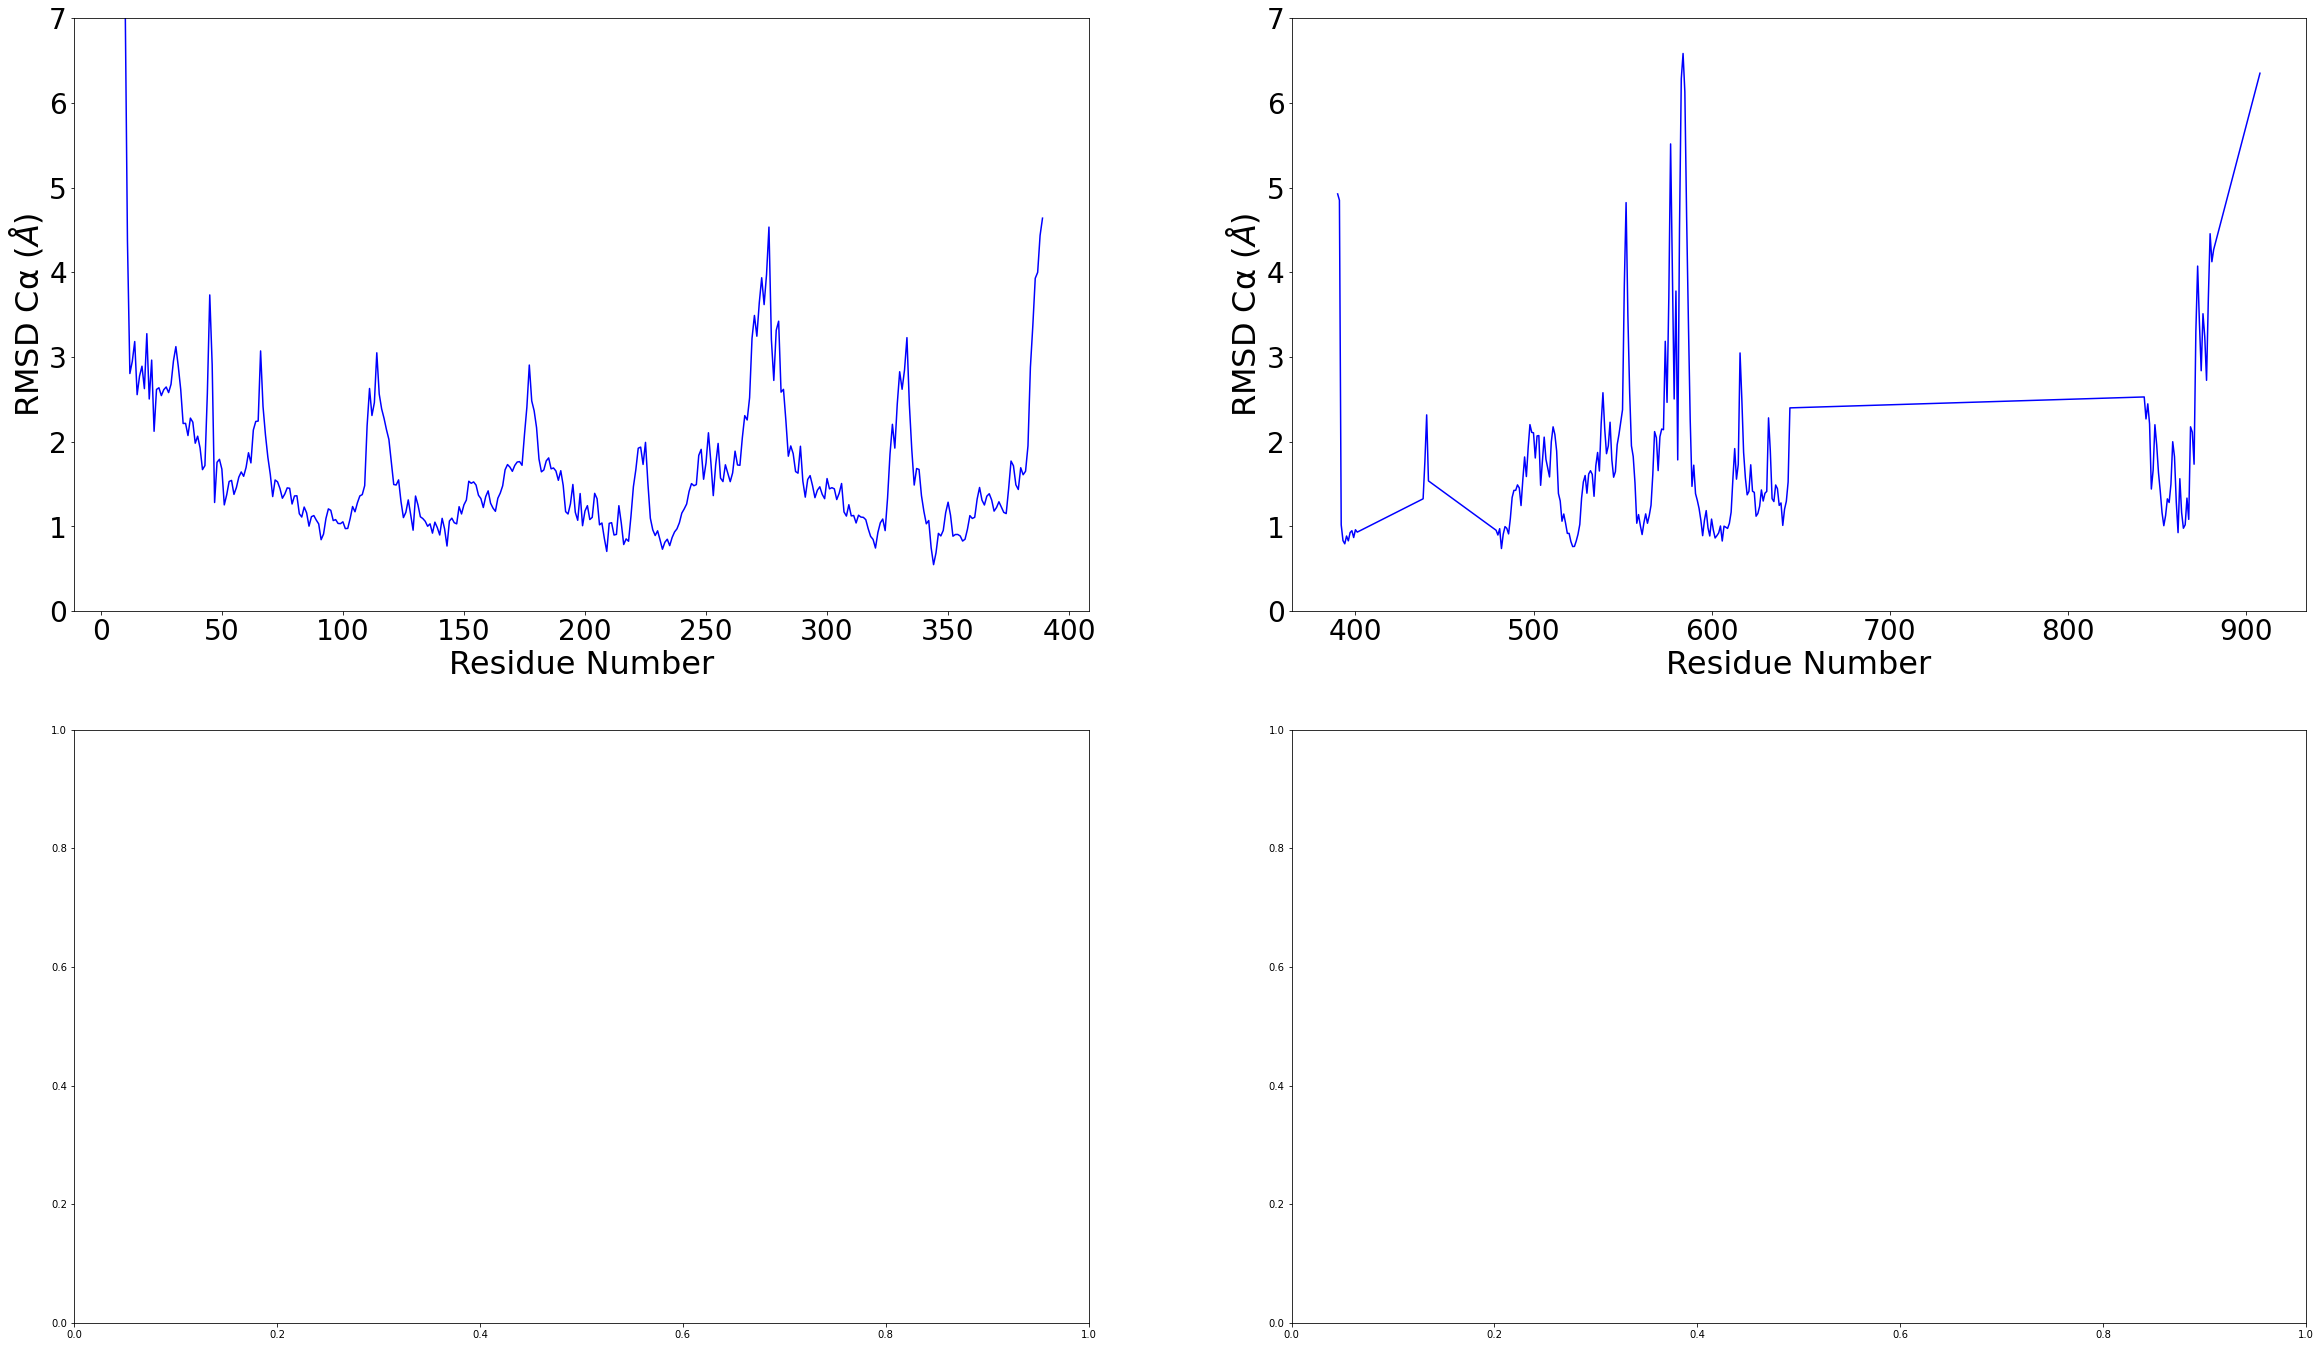

In [159]:
## Lasso = np.array(range(4,70))
TMD1 = np.array(range(4,386))
NBD1 = np.concatenate([range(386,402), range(439,508), range(509,645)])
TMD2 = np.concatenate([range(844,883), range(909,1172)])
NBD2 = np.array(range(1206,1436))

font = 30


fig, ax = plt.subplots(2,2)

fig.set_figheight(24)
fig.set_figwidth(40)


leg = np.array([[TMD1, NBD1] , [TMD2, NBD2]])
for (m,n), subplot in np.ndenumerate(ax):
    # WT CFTR
    ax[m,n].plot(WT_rmsd_data_cl_CM.index[leg[m,n]],WT_rmsd_data_cl_CM['avg'][leg[m,n]],color = 'blue')
    # F508del CFTR
    #ax[m,n].plot(WT_rmsd_data_cl.index[leg[m,n]],F508del_rmsd_data_cl['avg'][leg[m,n]],color = 'red')
    
    
    # R1070W 
    #ax[m,n].plot(WT_rmsd_data_cl.index[leg[m,n]],R1070W_rmsd_data_cl['avg'][leg[m,n]],color = 'lime')
    # V510D
    #ax[m,n].plot(WT_rmsd_data_cl.index[leg[m,n]],V510D_rmsd_data_cl['avg'][leg[m,n]],color = 'magenta')
    
    # Axes Labels, tick size, and axes limits
    ax[m,n].set_ylabel('RMSD C\u03B1' +  ' ' + '(' + r'$\AA$' + ')',fontsize=font+2)
    ax[m,n].set_xlabel('Residue Number',fontsize =font+2)
    ax[m,n].tick_params(labelsize =font-2)
    subplot.set_ylim(0,7)

Text(0, 0.5, 'RMSD Cα ($\\AA$)')

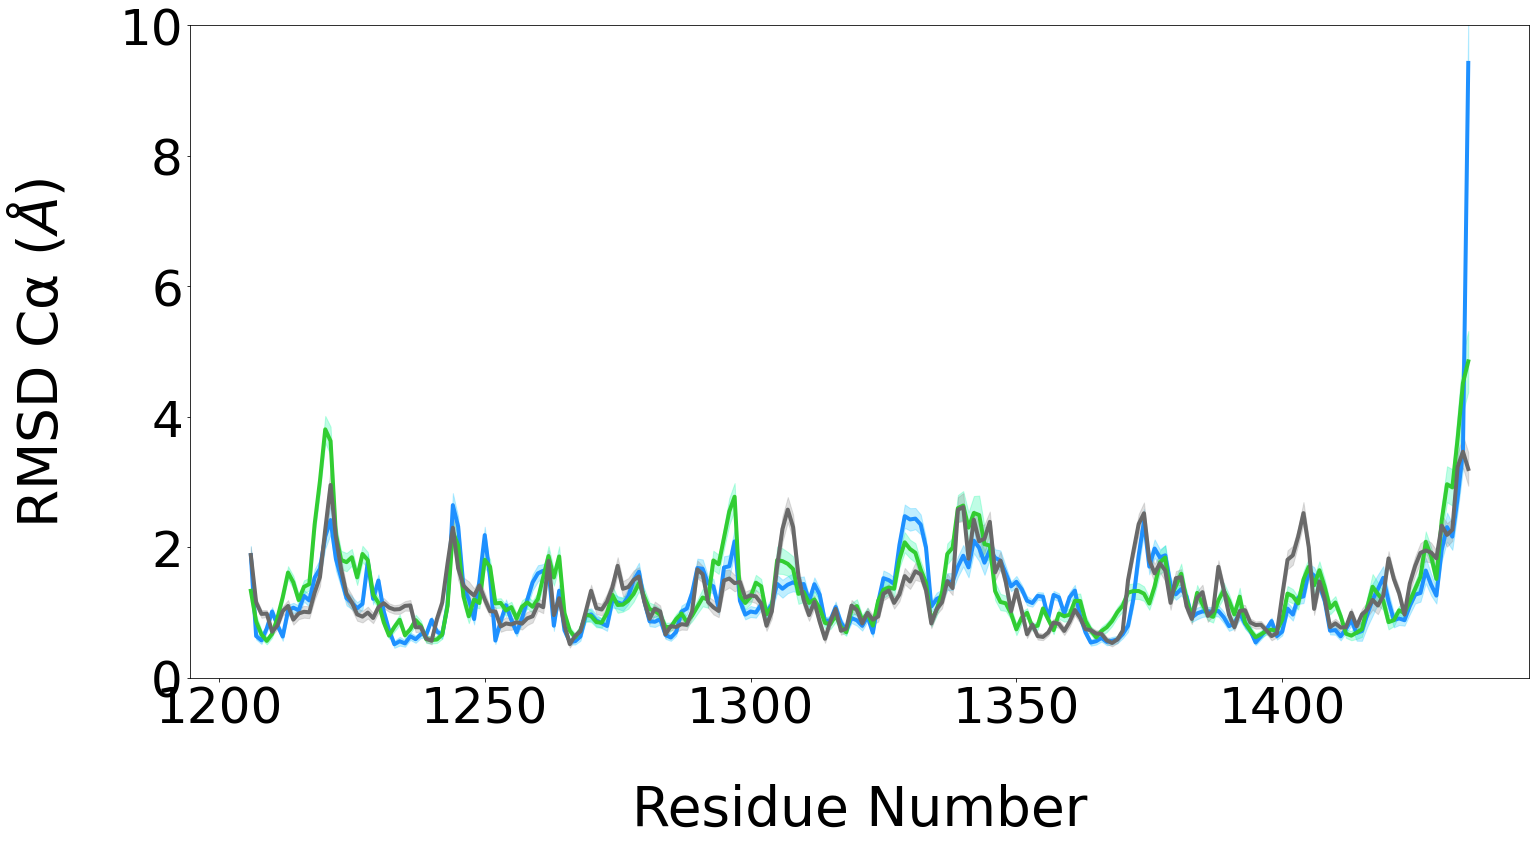

In [205]:
## Lasso = np.array(range(4,70))
TMD1 = np.array(range(4,386))
NBD1 = np.concatenate([range(386,402), range(439,508), range(509,645)])
TMD2 = np.concatenate([range(844,883), range(909,1172)])
NBD2 = np.array(range(1206,1436))
ICL4 = np.array(range(1015,1115))
ICL2 = np.array(range(225,325))
ICL1 = np.array(range(115,215))
a_subdom = np.concatenate([range(450,508), range(509,600)])
                
domain = NBD2
stat = 'conf_int'

plt.figure(figsize=(24,12))




#plt.plot(WT_rmsd_data_cl.index[domain],F508del_rmsd_data_cl['avg'][domain],color = 'crimson',linewidth = 4)
#plt.fill_between(WT_rmsd_data_cl.index[domain],
 #                F508del_rmsd_data_cl['avg'][domain] + F508del_rmsd_data_cl[stat][domain],
  #               F508del_rmsd_data_cl['avg'][domain] - F508del_rmsd_data_cl[stat][domain],
   #              color='red', alpha=.25)

plt.plot(WT_rmsd_data_cl.index[domain],WT_rmsd_data_cl_CM['avg'][domain],color = 'dodgerblue',linewidth = 4)
plt.fill_between(WT_rmsd_data_cl.index[domain],
                 WT_rmsd_data_cl_CM['avg'][domain] - WT_rmsd_data_cl_CM[stat][domain] ,
                 WT_rmsd_data_cl_CM['avg'][domain] + WT_rmsd_data_cl_CM[stat][domain] ,
                 color='deepskyblue', alpha=.25)

plt.plot(WT_rmsd_data_cl.index[domain],R1070W_rmsd_data_cl['avg'][domain],color = 'limegreen',linewidth = 4)
plt.fill_between(WT_rmsd_data_cl.index[domain],
                 R1070W_rmsd_data_cl['avg'][domain] + R1070W_rmsd_data_cl[stat][domain],
                 R1070W_rmsd_data_cl['avg'][domain] - R1070W_rmsd_data_cl[stat][domain],
                 color='mediumspringgreen', alpha=.25)

#plt.plot(WT_rmsd_data_cl.index[domain],VX_rmsd_data_cl['avg'][domain],color = 'darkmagenta',linewidth = 4)
#plt.fill_between(WT_rmsd_data_cl.index[domain],
 #                VX_rmsd_data_cl['avg'][domain] + VX_rmsd_data_cl[stat][domain],
  #               VX_rmsd_data_cl['avg'][domain] - VX_rmsd_data_cl[stat][domain],
   #              color='magenta', alpha=.25)

    
plt.plot(WT_rmsd_data_cl.index[domain],R_VX_rmsd_data_cl['avg'][domain],color = 'dimgrey',linewidth = 4)
plt.fill_between(WT_rmsd_data_cl.index[domain],
                 R_VX_rmsd_data_cl['avg'][domain] + R_VX_rmsd_data_cl[stat][domain],
                 R_VX_rmsd_data_cl['avg'][domain] - R_VX_rmsd_data_cl[stat][domain],
                 color='grey', alpha=.25)



plt.ylim(0,10)
#plt.xlim(1050,1090)
plt.plot()

font=55
plt.xticks(fontsize=font-5)
plt.yticks(fontsize=font-5)
plt.xlabel('Residue Number', fontsize=font, labelpad=50)
plt.ylabel('RMSD C\u03B1' +  ' ' + '(' + r'$\AA$' + ')', fontsize=font,labelpad=50)

#plt.savefig('../figures/domain_RMSD_plots/5uak_VX809_NBD2.svg', format='svg')


## Plot open conformation data

<ipython-input-165-536a7359f4ab>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  leg = np.array([[TMD1, NBD1] , [TMD2, NBD2]])


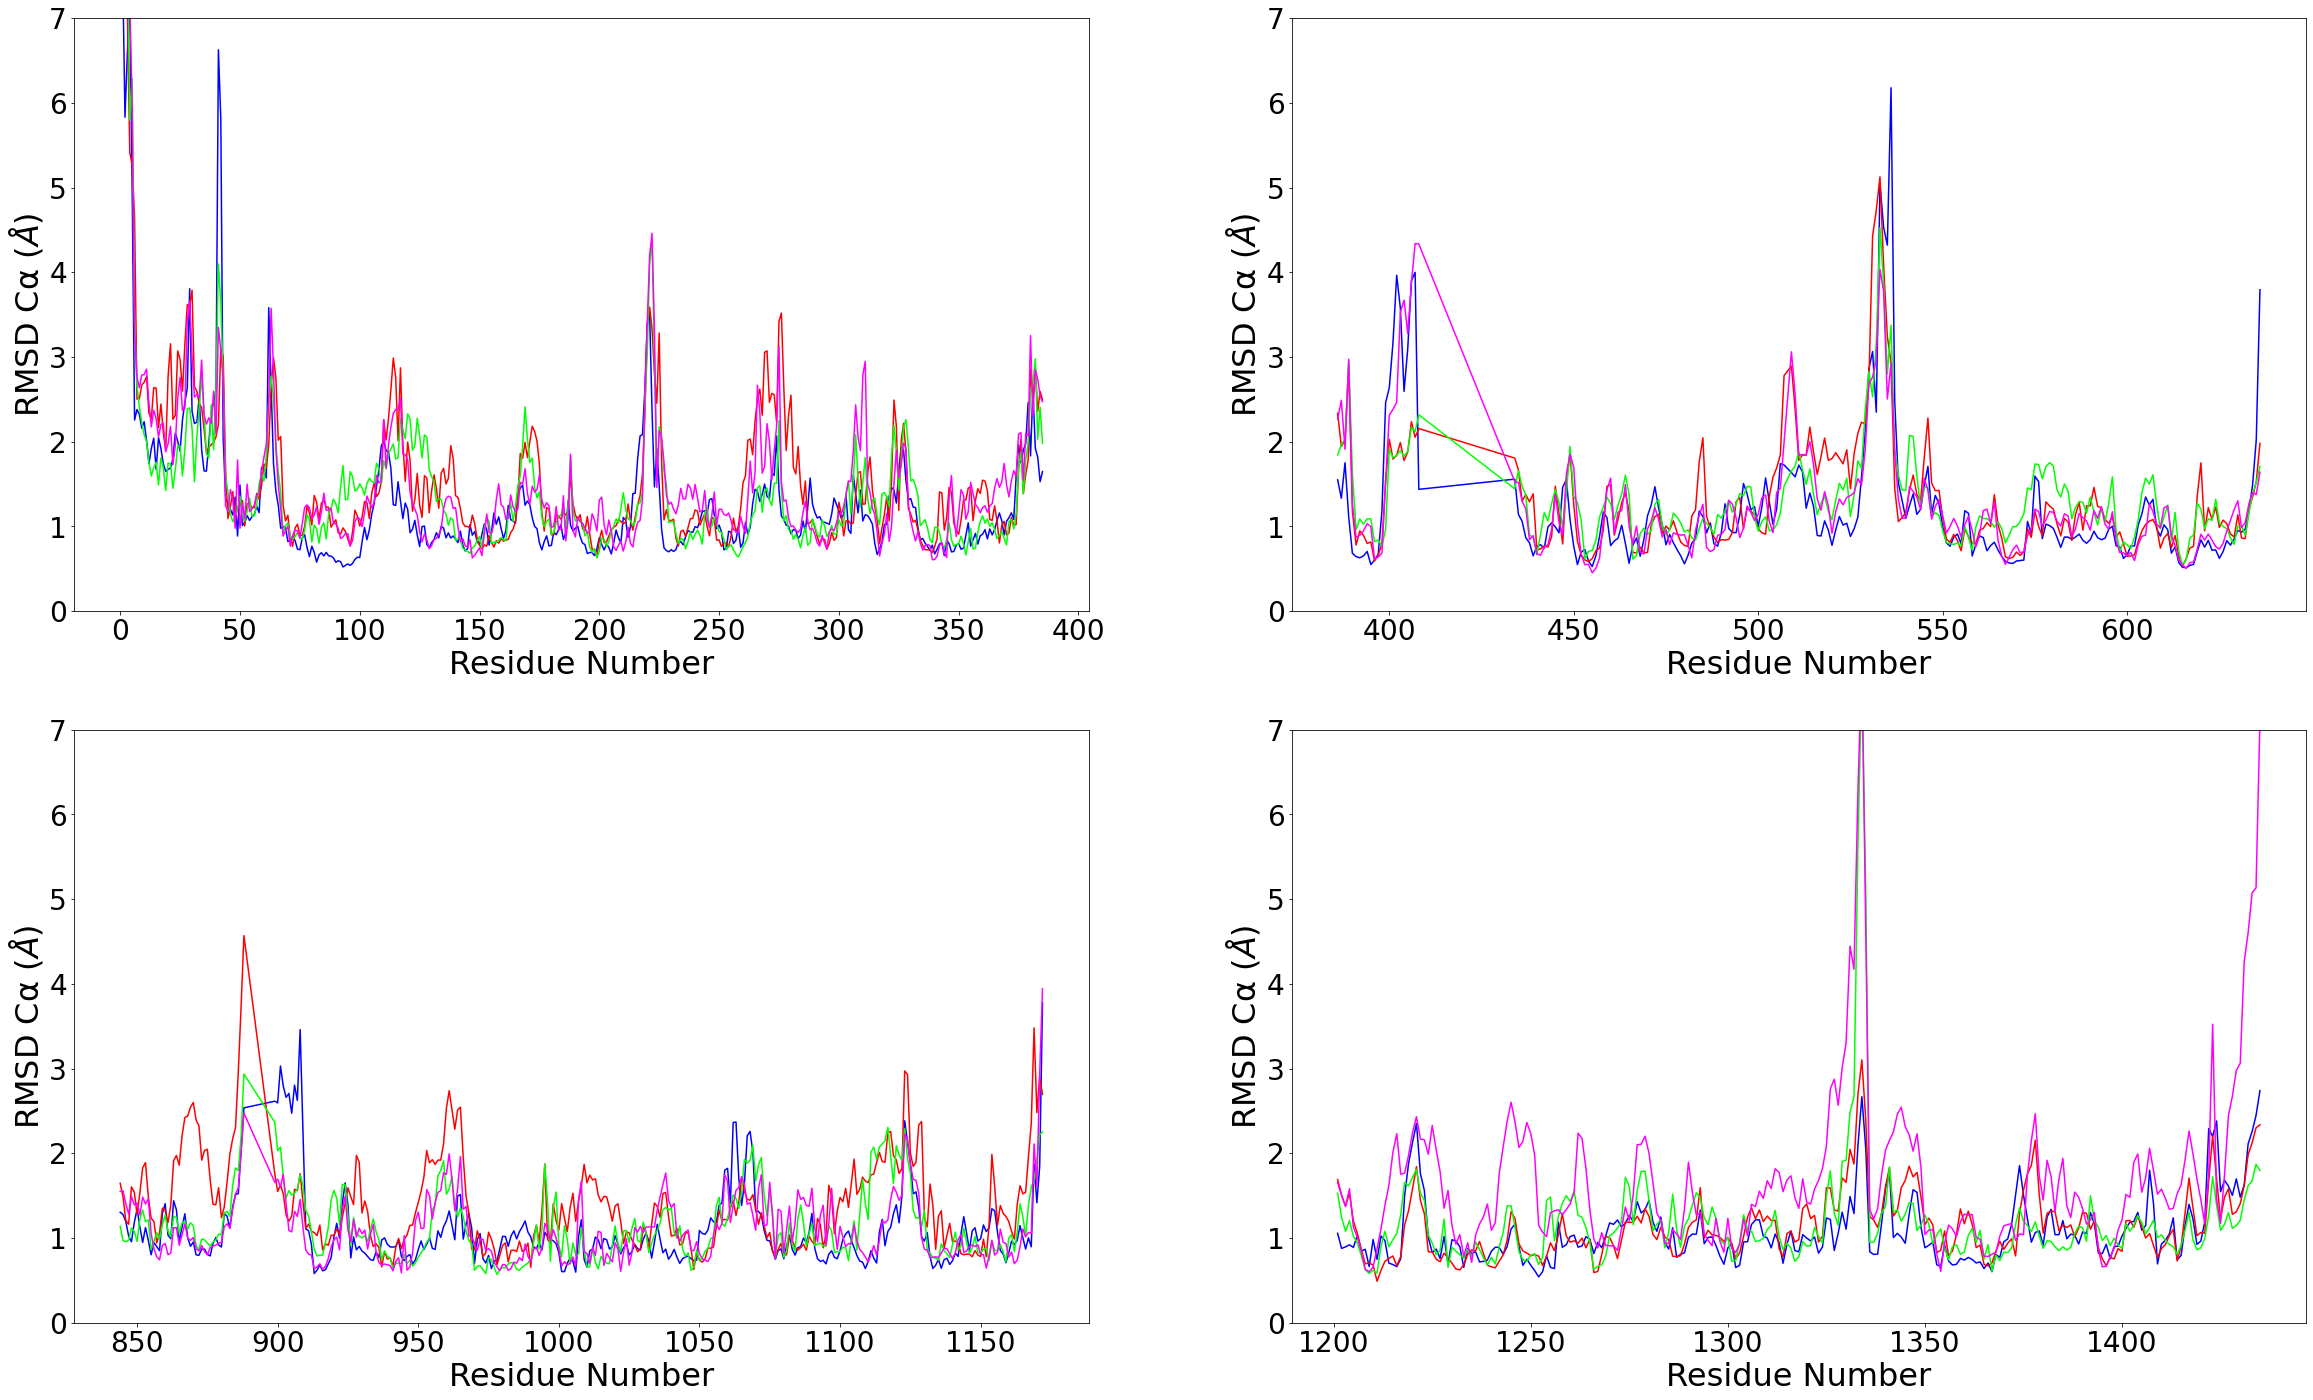

In [165]:
## Open State Human CFTR
TMD1 = np.array(range(0,386))
NBD1 = np.concatenate([range(386,409), range(434,508), range(509,637)])
TMD2 = np.concatenate([range(844,889), range(899,1173)])
NBD2 = np.array(range(1201,1436))

font = 30


fig, ax = plt.subplots(2,2)

fig.set_figheight(24)
fig.set_figwidth(40)


leg = np.array([[TMD1, NBD1] , [TMD2, NBD2]])
for (m,n), subplot in np.ndenumerate(ax):
    # WT CFTR
    ax[m,n].plot(WT_rmsd_data_op.index[leg[m,n]],WT_rmsd_data_op_CM['avg'][leg[m,n]],color = 'blue')
    # F508del CFTR
    ax[m,n].plot(WT_rmsd_data_op.index[leg[m,n]],F508del_rmsd_data_op['avg'][leg[m,n]],color = 'red')
    # R1070W/F508del CFTR
    ax[m,n].plot(WT_rmsd_data_op.index[leg[m,n]], R1070W_rmsd_data_op['avg'][leg[m,n]],color = 'lime')
    # V510D/F508del CFTR
    ax[m,n].plot(WT_rmsd_data_op.index[leg[m,n]], R_VX_rmsd_data_op['avg'][leg[m,n]],color = 'magenta')
    # Axes Labels, tick size, and axes limits
    ax[m,n].set_ylabel('RMSD C\u03B1' +  ' ' + '(' + r'$\AA$' + ')',fontsize=font+2)
    ax[m,n].set_xlabel('Residue Number',fontsize =font+2)
    ax[m,n].tick_params(labelsize =font-2)
    subplot.set_ylim(0,7)

#ax[0,0].text(0,3.5, 'TMD1', fontsize = font)
#ax[1,0].text(400,3.5, 'NBD1', fontsize = font)
#ax[0,1].text(1150,3.5, 'TMD2', fontsize = font)
#ax[1,1].text(1400,3.5, 'NBD2', fontsize = font)

Text(0, 0.5, 'RMSD Cα ($\\AA$)')

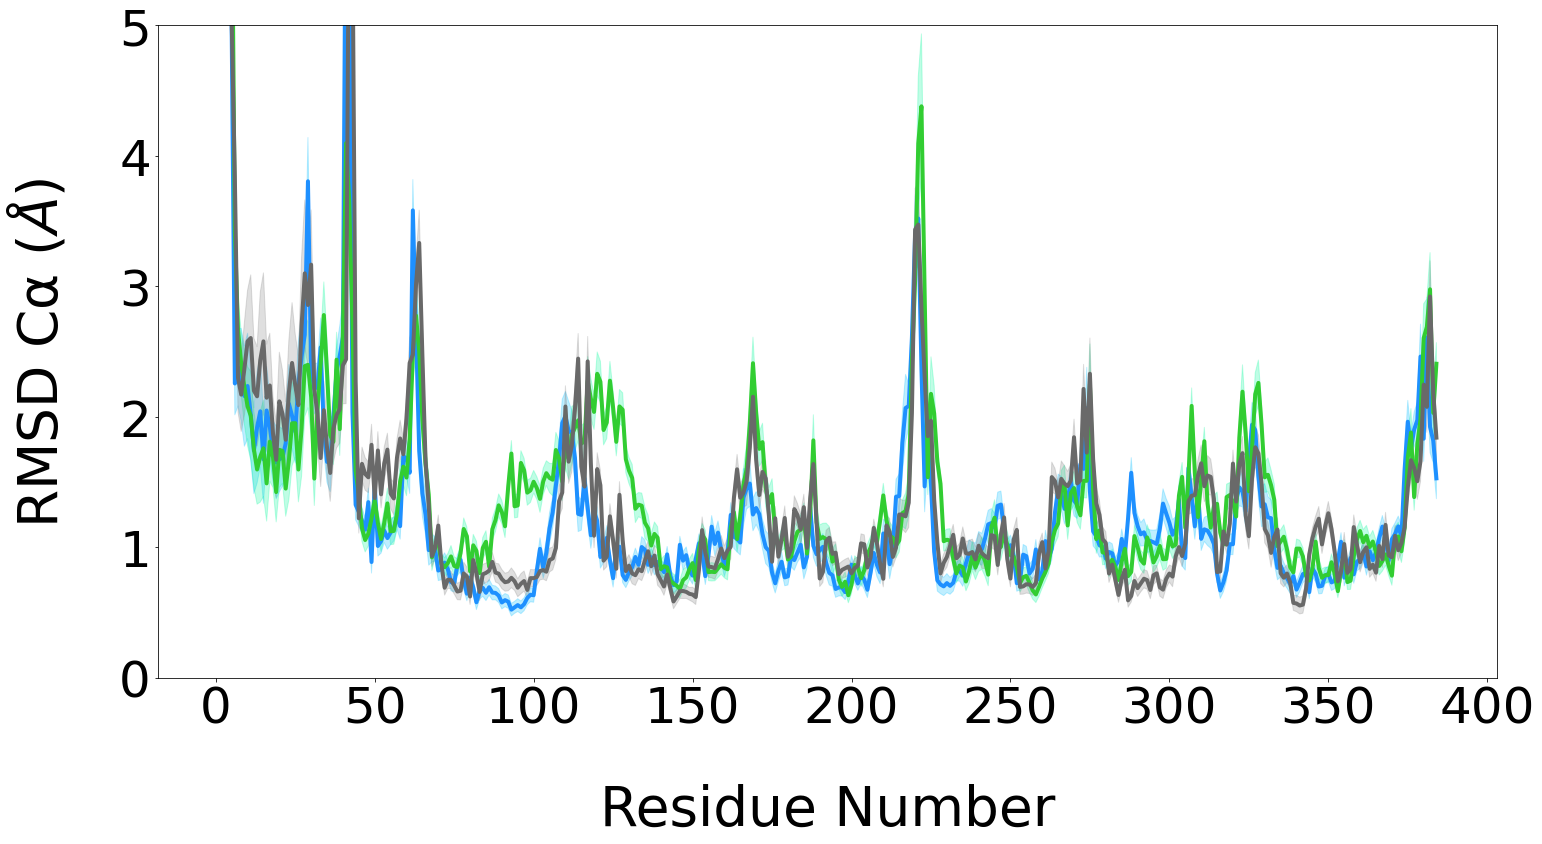

In [76]:
# Open State Human CFTR
TMD1 = np.array(range(1,385))
NBD1 = np.concatenate([range(386,409), range(434,508), range(509,637)])
TMD2 = np.concatenate([range(844,889), range(899,1173)])
NBD2 = np.array(range(1201,1436))
ICL4 = np.array(range(1015,1115))
ICL2 = np.array(range(225,325))
ICL1 = np.array(range(115,215))
a_subdom = np.concatenate([range(450,508), range(509,600)])

domain = TMD1

stat = 'conf_int'
plt.figure(figsize=(24,12))

#plt.plot(WT_rmsd_data_op.index[domain],WT_rmsd_data_op['avg'][domain],color = 'dodgerblue',linewidth = 4)
#plt.fill_between(WT_rmsd_data_op.index[domain],
 #                WT_rmsd_data_op['avg'][domain] + WT_rmsd_data_op[stat][domain],
  #               WT_rmsd_data_op['avg'][domain] - WT_rmsd_data_op[stat][domain],
   #              color='deepskyblue', alpha=.25)




#plt.plot(WT_rmsd_data_op.index[domain],F508del_rmsd_data_op['avg'][domain],color = 'crimson',linewidth = 4)
#plt.fill_between(WT_rmsd_data_op.index[domain],
#                 F508del_rmsd_data_op['avg'][domain] + F508del_rmsd_data_op[stat][domain],
 #                F508del_rmsd_data_op['avg'][domain] - F508del_rmsd_data_op[stat][domain],
  #               color='red', alpha=.25)

plt.plot(WT_rmsd_data_op.index[domain],WT_rmsd_data_op_CM['avg'][domain],color = 'dodgerblue',linewidth = 4)
plt.fill_between(WT_rmsd_data_op.index[domain],
                 WT_rmsd_data_op_CM['avg'][domain] - WT_rmsd_data_op_CM[stat][domain] ,
                 WT_rmsd_data_op_CM['avg'][domain] + WT_rmsd_data_op_CM[stat][domain] ,
                 color='deepskyblue', alpha=.25)

plt.plot(WT_rmsd_data_op.index[domain],R1070W_rmsd_data_op['avg'][domain],color = 'limegreen',linewidth = 4)
plt.fill_between(WT_rmsd_data_op.index[domain],
                 R1070W_rmsd_data_op['avg'][domain] + R1070W_rmsd_data_op[stat][domain],
                 R1070W_rmsd_data_op['avg'][domain] - R1070W_rmsd_data_op[stat][domain],
                 color='mediumspringgreen', alpha=.25)

#plt.plot(WT_rmsd_data_op.index[domain],VX_rmsd_data_op['avg'][domain],color = 'darkmagenta',linewidth = 4)
#plt.fill_between(WT_rmsd_data_op.index[domain],
 #                VX_rmsd_data_op['avg'][domain] + VX_rmsd_data_op[stat][domain],
  #               VX_rmsd_data_op['avg'][domain] - VX_rmsd_data_op[stat][domain],
   #              color='magenta', alpha=.25)

plt.plot(WT_rmsd_data_op.index[domain], R_VX_rmsd_data_op['avg'][domain],color = 'dimgrey',linewidth = 4)
plt.fill_between(WT_rmsd_data_op.index[domain],
                 R_VX_rmsd_data_op['avg'][domain] + R_VX_rmsd_data_op[stat][domain],
                 R_VX_rmsd_data_op['avg'][domain] - R_VX_rmsd_data_op[stat][domain],
                 color='grey', alpha=.25)


plt.ylim(0,5)


font=55
plt.xticks(fontsize=font-5)
plt.yticks(fontsize=font-5)
plt.xlabel('Residue Number', fontsize=font, labelpad=50)
plt.ylabel('RMSD C\u03B1' +  ' ' + '(' + r'$\AA$' + ')', fontsize=font,labelpad=50)


#plt.savefig('../figures/domain_RMSD_plots/6msm_VX809_NBD2.svg', format='svg')


In [206]:
closed_df = pd.DataFrame()
closed_df['avg'] = R_VX_rmsd_data_cl['avg'] - R1070W_rmsd_data_cl['avg']

In [77]:
open_df = pd.DataFrame()
open_df['avg'] =  R_VX_rmsd_data_op['avg'] - R1070W_rmsd_data_op['avg']

In [78]:
# put the average values in b factor format: http://pldserver1.biochem.queensu.ca/~rlc/work/pymol/
with open('../figures/RMSD_txt_data/6msm_R1070W_VX809_res_rmsd_data_diff.txt', 'a') as the_file:
    for index, row in open_df.iterrows():  
            rmsd = str(row['avg'])
            res = str(CFTR_seq[index])
            resnum = str(index)
            line = ['A', resnum, aa[res], rmsd]
            item = ' '.join(line) + '\n'
            the_file.write(item)
            
the_file.close()